
#  **Model Building End-to-End Series**


### **Importing Libraries**

In [2]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report

---
<a name = Section4></a>
# **4. Loading data using Pandas**
---

In [3]:
data = pd.read_csv("ChildStatusF.csv")
data.head()

,height,weight,status
0,67,7000,1
1,65,5000,1
2,66,6000,1
3,66,6000,1
4,72,8000,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1679 entries, 0 to 1678
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   height  1679 non-null   int64
 1   weight  1679 non-null   int64
 2   status  1679 non-null   int64
dtypes: int64(3)
memory usage: 39.5 KB


---
<a name = Section4></a>
# **5. Separating data into train and test sets**
---

<a id=section5></a>
## 5.1 Separating Independent and Dependent variables

In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [13]:
X = data.drop('status', axis = 1)
y = data['status']

In [14]:
X.shape

(1679, 2)

In [15]:
y.shape

(1679,)

<a id=section5></a>
## 5.2 Splitting data into train and test set.

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 1)

---
<a name = Section6></a>
# **6. Model Building**
---

In [18]:
#Logistic Regression

log_model = LogisticRegression(max_iter=1000)
scores = cross_val_score(estimator=log_model, X=X_train, y=y_train)
print(scores)
print("Mean", scores.mean())

[0.65055762 0.6802974  0.68401487 0.69402985 0.69776119]
Mean 0.6813321866503912


In [19]:
# Decision Tree
decision_tree = DecisionTreeClassifier(max_depth = 9, random_state = 123,
                                       splitter = "best", criterion = "gini")
scores = cross_val_score(estimator=decision_tree, X=X_train, y=y_train)
print(scores)
print("Mean", scores.mean())

[0.65799257 0.6802974  0.69516729 0.69402985 0.70149254]
Mean 0.6857959274260667


In [20]:
model_rf = RandomForestClassifier()

In [21]:
# Random Forest
model_rf = RandomForestClassifier(n_estimators=1000 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)
scores = cross_val_score(estimator=model_rf, X=X_train, y=y_train)
print(scores)
print("Mean", scores.mean())

[0.69144981 0.71003717 0.71003717 0.71641791 0.71268657]
Mean 0.7081257282361426


In [22]:
# K – Nearest Neighbor Classifier
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn_classifier.fit(X_train, y_train)
y_pred_knn = knn_classifier.predict(X_test)
accuracy_score(y_test, y_pred_knn)

0.6488095238095238

### 6.1 CHECKING FEATURE IMPORTANCE

In [23]:
model_rf.fit(X_train,y_train)

RandomForestClassifier(max_leaf_nodes=30, n_estimators=1000, n_jobs=-1,
                       oob_score=True, random_state=50)

In [24]:
# Checking the feature importances of various features.
# Sorting the importances by descending order (lowest importance at the bottom).
for score, name in sorted(zip(model_rf.feature_importances_, X_train.columns), reverse=True):
    print('Feature importance of', name, ':', score*100, '%')

Feature importance of weight : 55.582944982433425 %
Feature importance of height : 44.417055017566575 %


In [25]:
model_rf.feature_importances_*100

array([44.41705502, 55.58294498])

Text(0.5, 1.0, 'Feature Importance of each Feature')

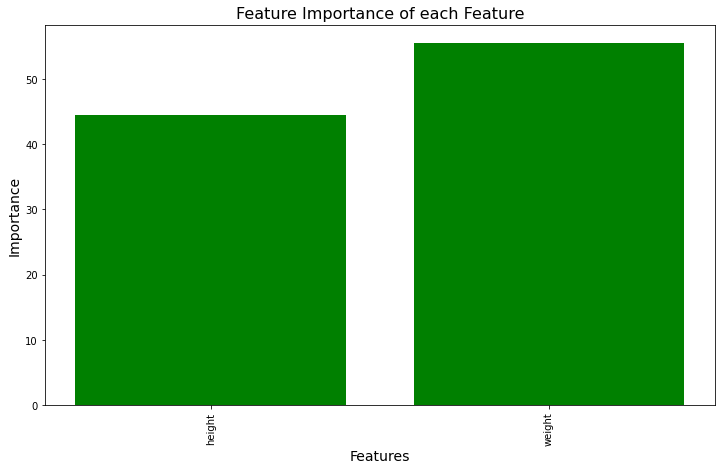

In [26]:
# Plotting the Feature Importance of each feature.
plt.figure(figsize=(12, 7))
plt.bar(X_train.columns, model_rf.feature_importances_*100, color='green')
plt.xlabel('Features', fontsize=14)
plt.ylabel('Importance', fontsize=14)
plt.xticks(rotation=90)
plt.title('Feature Importance of each Feature', fontsize=16)

###  **Saving the model as Pickle String**

In [27]:
import pickle

In [28]:
pickle.dump(model_rf, open("randomforest.pkl","wb"))